<a href="https://colab.research.google.com/github/AllenHichard/Projetos_Algoritmos/blob/master/HeapXBucketSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algoritmos

In [2]:
def bucket_sort(input_list):
    # Find maximum value in the list and use length of the list to determine which value in the list goes into which bucket
    max_value = max(input_list)
    size = max_value / len(input_list)

    # Create n empty buckets where n is equal to the length of the input list
    buckets_list = []
    for x in range(len(input_list)):
        buckets_list.append([])

        # Put list elements into different buckets based on the size
    for i in range(len(input_list)):
        j = int(input_list[i] / size)
        if j != len(input_list):
            buckets_list[j].append(input_list[i])
        else:
            buckets_list[len(input_list) - 1].append(input_list[i])

    # Sort elements within the buckets using Insertion Sort
    for z in range(len(input_list)):
        insertion_sort(buckets_list[z])

    # Concatenate buckets with sorted elements into a single list
    final_output = []
    for x in range(len(input_list)):
        final_output = final_output + buckets_list[x]
    return final_output


def insertion_sort(bucket):
    for i in range (1, len (bucket)):
        var = bucket[i]
        j = i - 1
        while (j >= 0 and var < bucket[j]):
            bucket[j + 1] = bucket[j]
            j = j - 1
        bucket[j + 1] = var

def heapify(array, n, i):
    largest = i
    left = 2*i + 1
    right = 2*i + 2
    if left < n and array[i] < array[left]:
        largest = left
    if right < n and array[largest] < array[right]:
        largest = right
    if largest != i:
        array[i],array[largest] = array[largest], array[i]
        heapify(array, n, largest)

def heap_sort_in_place(array):
    size = len(array)
    for i in range(size//2-1, -1, -1):
        heapify(array, size, i)
    for i in range(size-1, 0, -1):
        array[i], array[0] = array[0], array[i]
        heapify(array, i, 0)



def heap_sort_not_in_place(array):
    heap = []
    for element in array:
        heappush(heap, element)
    ordered = []

    # While we have elements left in the heap
    while heap:
        ordered.append(heappop(heap))

    #return array
    return ordered


def heappush(heap, item):
    """Push item onto heap, maintaining the heap invariant."""
    heap.append(item)
    _siftdown(heap, 0, len(heap)-1)

def _siftdown(heap, startpos, pos):
    newitem = heap[pos]
    # Follow the path to the root, moving parents down until finding a place
    # newitem fits.
    while pos > startpos:
        parentpos = (pos - 1) >> 1
        parent = heap[parentpos]
        if newitem < parent:
            heap[pos] = parent
            pos = parentpos
            continue
        break
    heap[pos] = newitem

def heappop(heap):
    """Pop the smallest item off the heap, maintaining the heap invariant."""
    lastelt = heap.pop()    # raises appropriate IndexError if heap is empty
    if heap:
        returnitem = heap[0]
        heap[0] = lastelt
        _siftup(heap, 0)
        return returnitem
    return lastelt

def _siftup(heap, pos):
    endpos = len(heap)
    startpos = pos
    newitem = heap[pos]
    # Bubble up the smaller child until hitting a leaf.
    childpos = 2*pos + 1    # leftmost child position
    while childpos < endpos:
        # Set childpos to index of smaller child.
        rightpos = childpos + 1
        if rightpos < endpos and not heap[childpos] < heap[rightpos]:
            childpos = rightpos
        # Move the smaller child up.
        heap[pos] = heap[childpos]
        pos = childpos
        childpos = 2*pos + 1
    # The leaf at pos is empty now.  Put newitem there, and bubble it up
    # to its final resting place (by sifting its parents down).
    heap[pos] = newitem
    _siftdown(heap, startpos, pos)


  

Coleta de dados dos experimentos

In [4]:
import time
from numpy import random
DOMAIN = 10000 ##Você deve escolher um valor mais adequado
def avg_time(domain, tam, func, rounds, test = False): 
  sum = float(0)
  for i in range(rounds):
    #create a list with random numbers
    random.seed(i)
    L= list(random.randint(domain, size=tam))
    #L = [random.randint(0, domain) for _ in range(tam)]
    start = time.time()    
    func(L) 
    end = time.time()
    sum += end-start
    #if test:
      #assert L == sorted(L)
  return sum/rounds

#defines the algorithms to be processed
algorithms = [heap_sort_in_place, heap_sort_not_in_place, bucket_sort]

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 1

sizes = [1000,2000,3000,4000,5000] ##você deve escolher tamanhos mais adequados
mapSizeToTime = dict()
for i in range(len(sizes)):
  print(f"Starting experiments for datasets with size={sizes[i]}, each experiment has {num_rounds} rounds.")
  
  ##Map list size to algorithm average time
  for algorithm in algorithms:      
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avg_time(DOMAIN, sizes[i], algorithm, num_rounds, True)
  
print(f"Finish data collection")

Starting experiments for datasets with size=1000, each experiment has 1 rounds.
Starting experiments for datasets with size=2000, each experiment has 1 rounds.
Starting experiments for datasets with size=3000, each experiment has 1 rounds.
Starting experiments for datasets with size=4000, each experiment has 1 rounds.
Starting experiments for datasets with size=5000, each experiment has 1 rounds.
Finish data collection


Formata os dados do experimento para serem exibidos

In [5]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
heap_sort_in_place##1000,0.006664,heap_sort_in_place,1000
heap_sort_not_in_place##1000,0.004343,heap_sort_not_in_place,1000
bucket_sort##1000,0.005187,bucket_sort,1000
heap_sort_in_place##2000,0.012262,heap_sort_in_place,2000
heap_sort_not_in_place##2000,0.009414,heap_sort_not_in_place,2000
bucket_sort##2000,0.014773,bucket_sort,2000
heap_sort_in_place##3000,0.019516,heap_sort_in_place,3000
heap_sort_not_in_place##3000,0.014789,heap_sort_not_in_place,3000
bucket_sort##3000,0.030589,bucket_sort,3000
heap_sort_in_place##4000,0.027047,heap_sort_in_place,4000


Resultado do experimento (gráfico)

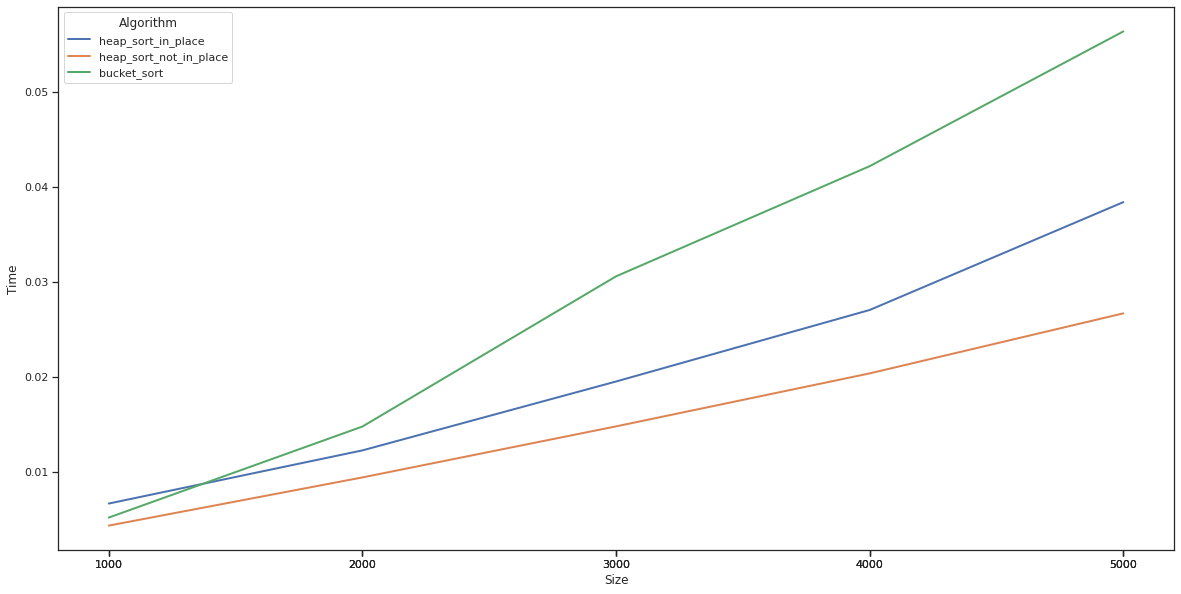

In [6]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
#g.set_yscale('log')
g.set(xticks=[i for i in df.Size])
plt.show()